# Compare with Hiroshi's trajectories

As a sanity check, want to compare trajectories computer by SeaIcBacktrack and those calculated for Sumata et al 2022.

The code isn't identical, but I expect a decent match.

In [1]:
#Imports 
import pickle
import datetime

import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
from kval.maps import quickmap

In [2]:
print('Running other notebooks: Preparing data..\r', end = '')
%run "Load and prepare data.ipynb"
print('Running other notebooks: Defining particle tracking class..', end = '')
%run "Define particle tracking class.ipynb"
print('  ..done.')

Running other notebooks: Defining particle tracking class..  ..done.


In [3]:
## 

ddir_hiroshi = '../files_from_hiroshi/'

In [4]:
%run '../files_from_hiroshi/trajectory_util.py'

/home/oyvindl/work/code/python/SeaIceBacktrack/validation/trajectory_vs_sumata_new/files_from_hiroshi/trajectory_util.py:403: SyntaxWarning: invalid escape sequence '\ '
  sys.exit('ERROR: data does not exit, \    fname =' + fname)
/home/oyvindl/work/code/python/SeaIceBacktrack/validation/trajectory_vs_sumata_new/files_from_hiroshi/trajectory_util.py:403: SyntaxWarning: invalid escape sequence '\ '
  sys.exit('ERROR: data does not exit, \    fname =' + fname)


In [30]:
with open(f'{ddir_hiroshi}/FS.2018.01.backward_traj.731_days.n_8.pkl', 'rb') as f:
    trajectories = pickle.load(f) 

In [65]:
traj_ind = 0
traj_sel = trajectories[traj_ind]
lon_traj = np.array(traj_sel.lonlats)[:, 0]
lat_traj = np.array(traj_sel.lonlats)[:, 1]
start_date_traj = traj_sel.stamps[0]
lon0_traj = lon_traj[0]
lat0_traj = lat_traj[1]

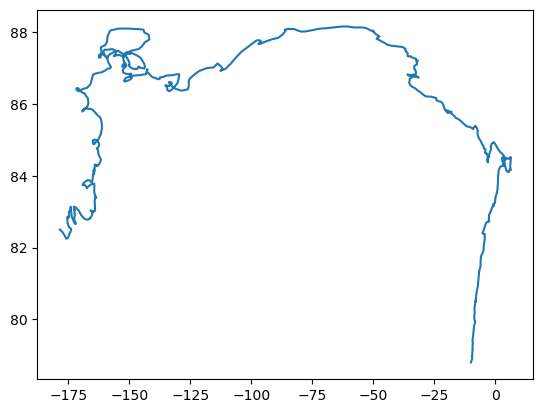

In [66]:
fig, ax = plt.subplots()
ax.plot(lon_traj, lat_traj)

In [67]:
crs = ccrs.Stereographic(central_latitude=80.0, central_longitude=0.0, false_easting=0.0, 
                          false_northing=0.0, true_scale_latitude=None, globe=None)

/home/oyvindl/mambaforge/envs/SeaIceTraj/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


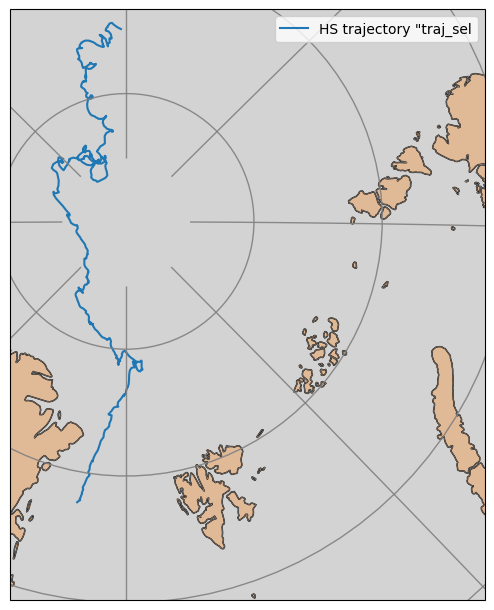

In [68]:
plt.close('all')
fig = plt.figure(figsize = [6.45, 7.67])
ax = fig.add_subplot(111, projection=crs)

ax.coastlines()
ax.add_feature(cfeature.LAND, color = 'tab:orange', alpha = 0.3)
ax.add_feature(cfeature.COASTLINE, color = 'gray', lw = 0.5)
ax.set_extent([-45, 125, 60, 60])

ax.set_xlim(-511665, 1579472)
ax.set_ylim(-546114, 2055926)
ax.set_facecolor('lightgray')


ax.plot(lon_traj, lat_traj, transform = ccrs.PlateCarree(), label = 'HS trajectory "traj_sel')
#ax.plot(Plon[0], Plat[0], 'ok', transform = ccrs.PlateCarree(), label = 'Start %s'%datestr)

gls = ax.gridlines(draw_labels=False, crs=ccrs.PlateCarree(), lw=1, color="gray",
        y_inline=True, xlocs=range(-180,180,45), ylocs=range(0,90,5), alpha = 0.9,  ylim=87.5, )
ax.legend()

#### Backtrack

In [69]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
IC_dict = {'D':D, 
          'lat0':lat0_traj, 
          'lon0':lon0_traj, 
          'time0':start_date_traj, 
          'MASK':MASK, 'interp_method':'linear', 'end_criteria':'ABC' }
    
# Set up object, compute the trajectory, and save to TRAJS
P = ice_particle(IC_dict)
P.backtrack()

Setting up object ..
 ..done.
BACKTRACKING: Time step 23 (23 Dec 2017) - 77.8 km ..

In [ ]:
crs = ccrs.Stereographic(central_latitude=80.0, central_longitude=0.0, false_easting=0.0, 
                          false_northing=0.0, true_scale_latitude=None, globe=None)

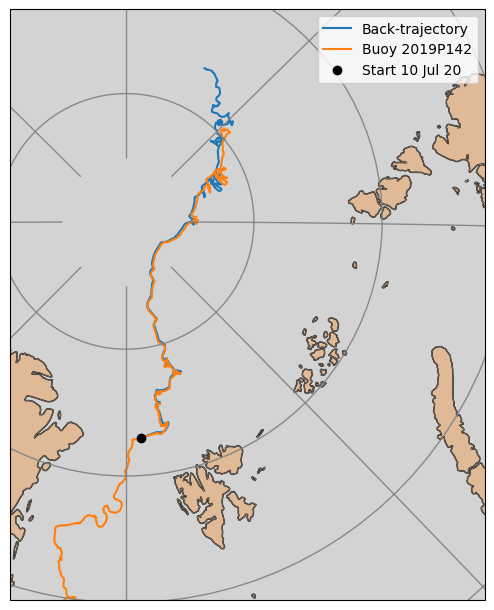

In [16]:
plt.close('all')
fig = plt.figure(figsize = [6.45, 7.67])
ax = fig.add_subplot(111, projection=crs)

ax.coastlines()
ax.add_feature(cfeature.LAND, color = 'tab:orange', alpha = 0.3)
ax.add_feature(cfeature.COASTLINE, color = 'gray', lw = 0.5)
ax.set_extent([-45, 125, 60, 60])

ax.set_xlim(-511665, 1579472)
ax.set_ylim(-546114, 2055926)
ax.set_facecolor('lightgray')



Plat, Plon = P.ease2_to_latlon.transform(P.x, P.y)

datestr = num2date(date2num(P.time0)).strftime('%d %b %y')

ax.plot(Plon, Plat, transform = ccrs.PlateCarree(), label = 'Back-trajectory')
ax.plot(lon_traj, lat_traj, transform = ccrs.PlateCarree(), label = 'HS trajectory "traj_sel')
ax.plot(Plon[0], Plat[0], 'ok', transform = ccrs.PlateCarree(), label = 'Start %s'%datestr)

gls = ax.gridlines(draw_labels=False, crs=ccrs.PlateCarree(), lw=1, color="gray",
        y_inline=True, xlocs=range(-180,180,45), ylocs=range(0,90,5), alpha = 0.9,  ylim=87.5, )
ax.legend()